In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx
from create_env import *
import utils as utils
import numpy as np

In [3]:
import sys
sys.path.append("../")

In [5]:
from graph import *

In [6]:

number_agents = 4

size_side = 7
env = EnvWrapperGraph(width=size_side,
              height=size_side,
              rail_generator=complex_rail_generator(nr_start_goal=10, nr_extra=1, 
                                                    min_dist=6, max_dist=99999, 
                                                    seed = np.random.randint(0,2000)),
              schedule_generator=complex_schedule_generator(),
              number_of_agents=number_agents,
              obs_builder_object=GlobalObsForRailEnv())

env.reset()



env_renderer = RenderTool(env)
env_renderer.render_env(show=True, show_predictions=False, show_observations=False)

node (3, 3) has a bad connection: ['00030003a', '00040003a', '00030003b']
node (4, 3) has a bad connection: ['00040003a', '00040004b', '00040003a']
node (5, 4) has a bad connection: ['00050004a', '00040004b', '00050004a']
node (5, 5) has a bad connection: ['00050005a', '00050004b', '00050005b']
node (6, 4) has a bad connection: ['00060004a', '00060003a', '00060004b']
node (3, 3) has a bad connection: ['00030003a', '00040003a', '00030003b']
node (4, 3) has a bad connection: ['00040003a', '00040004b', '00040003a']
node (5, 4) has a bad connection: ['00050004a', '00040004b', '00050004a']
node (5, 5) has a bad connection: ['00050005a', '00050004b', '00050005b']
node (6, 4) has a bad connection: ['00060004a', '00060003a', '00060004b']


In [7]:
matrix_rail = np.array(env.rail.grid.tolist())

In [39]:
test = NetworkGraph(matrix_rail)

In [9]:
number_of_edges_inside_super_nodes = 0
for index, cell in np.ndenumerate(matrix_rail):
    if cell >0:
        superNode = test.get_superNode_at(index)
        number_of_edges_inside_super_nodes += len(superNode.edges)


In [10]:
number_of_edges_inside_super_nodes

84

In [11]:
len(test.edges)

156

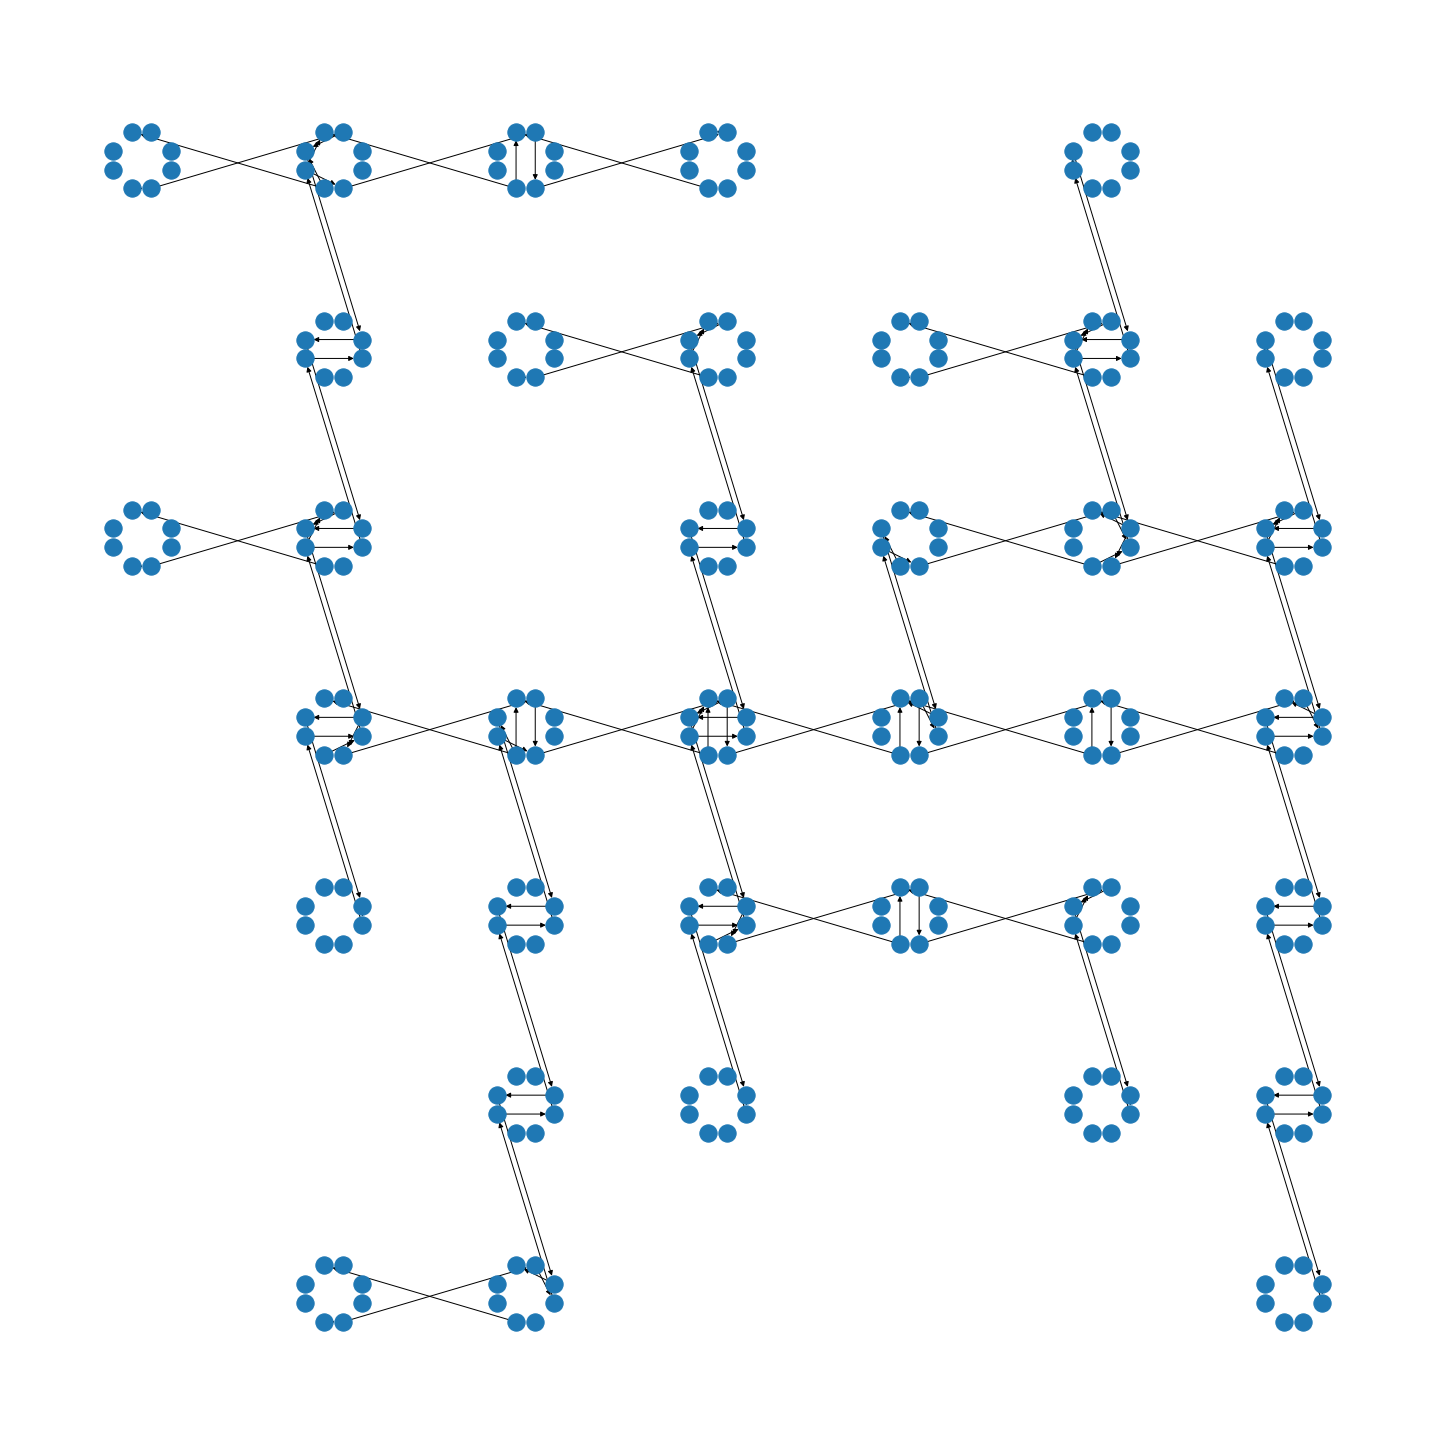

In [40]:
test.show()

/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/charles/anaconda3/envs/flatland-rl/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


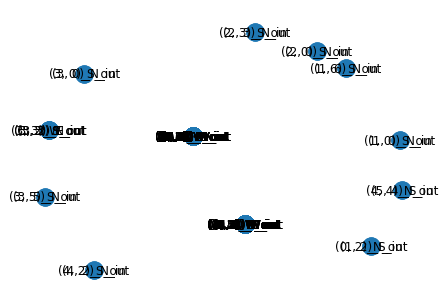

In [54]:
nx.draw_kamada_kawai(test,with_labels = True)
plt.show()

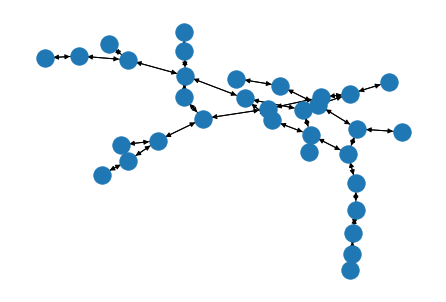

In [14]:
nx.draw(test.graph_connectivity)

(0, 0)


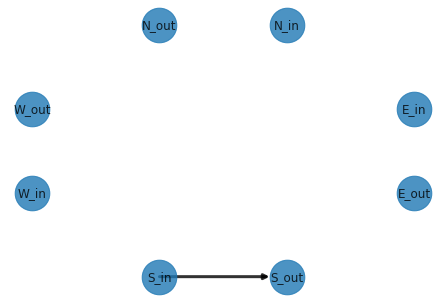

(0, 2)


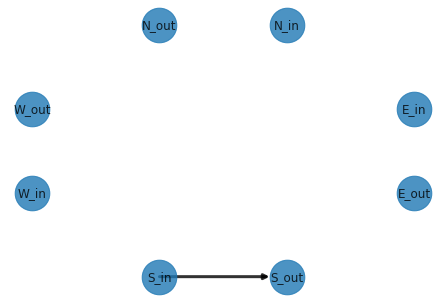

(0, 6)


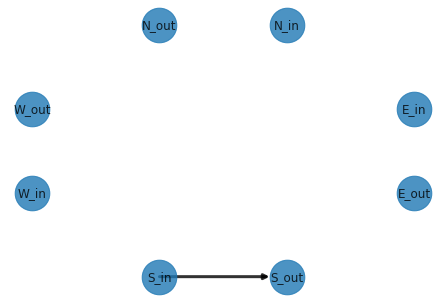

(1, 0)


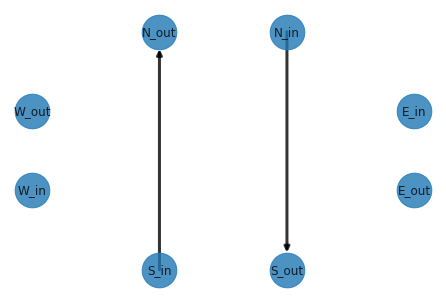

(1, 2)


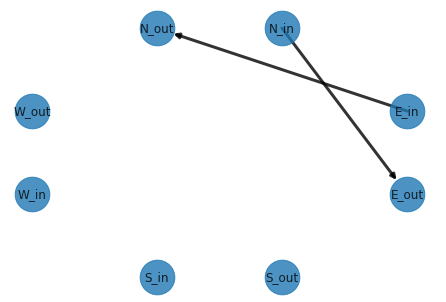

(1, 3)


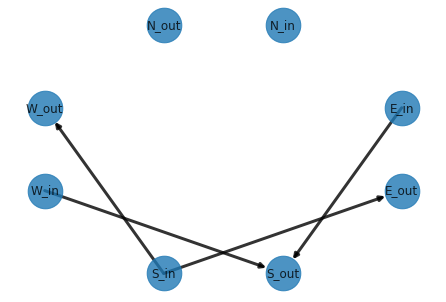

(1, 4)


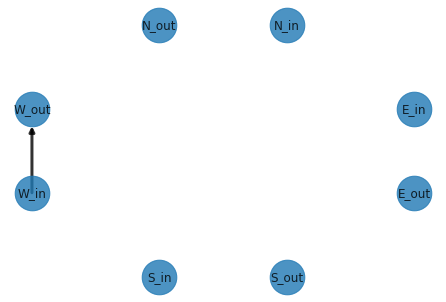

(1, 6)


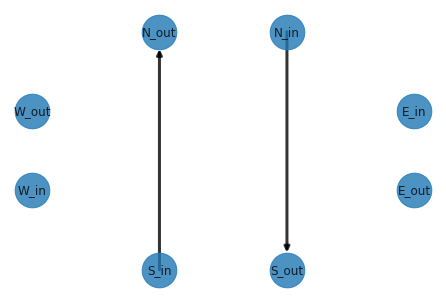

(2, 0)


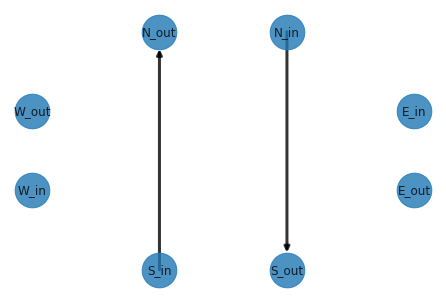

(2, 1)


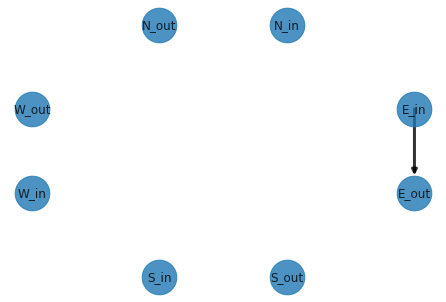

(2, 2)


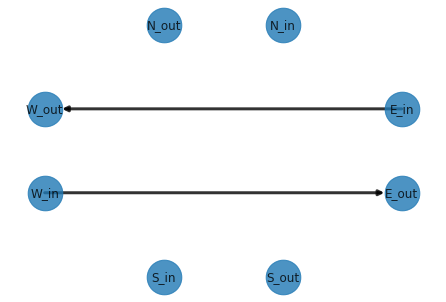

(2, 3)


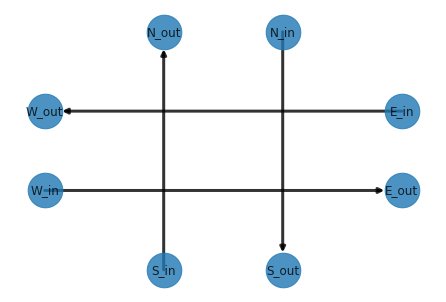

(2, 4)


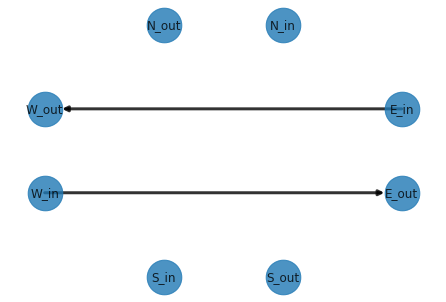

(2, 5)


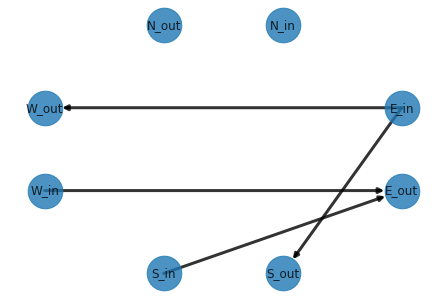

(2, 6)


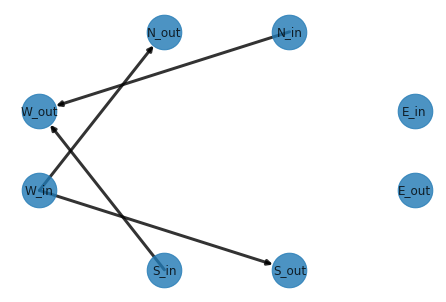

(3, 0)


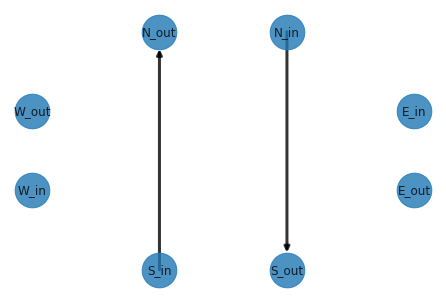

(3, 2)


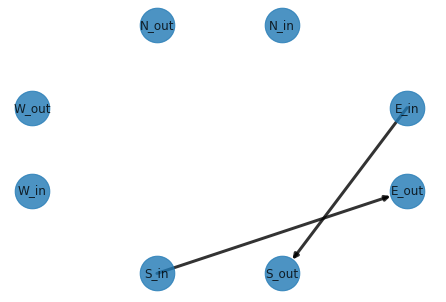

(3, 3)


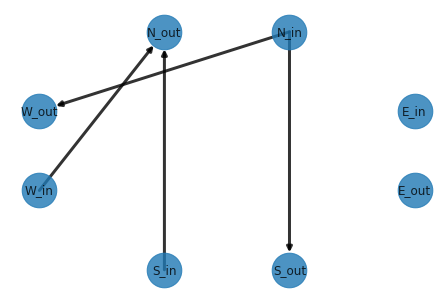

(3, 5)


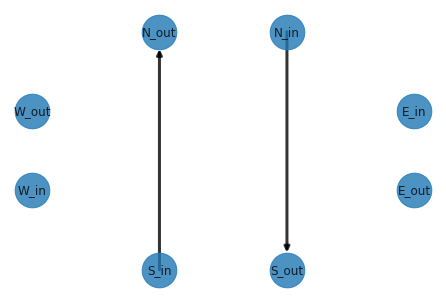

(3, 6)


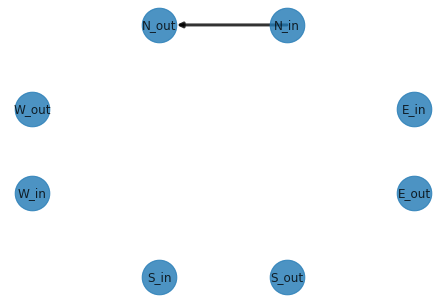

(4, 0)


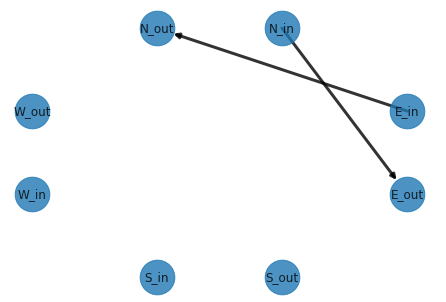

(4, 1)


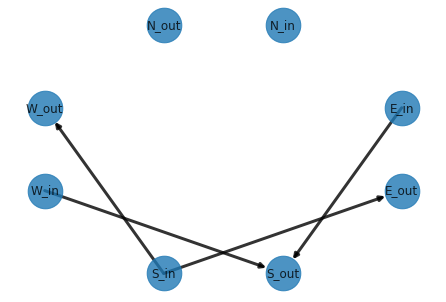

(4, 2)


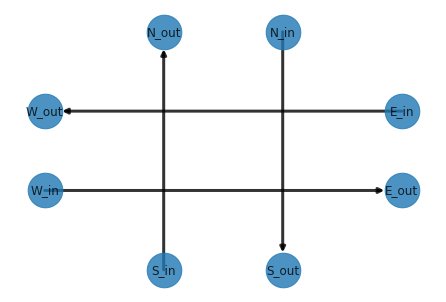

(4, 3)


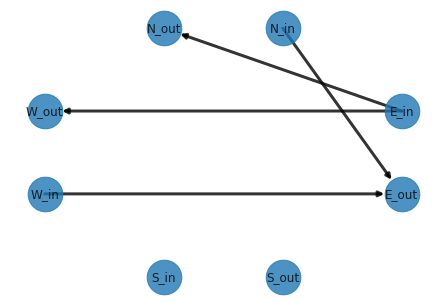

(4, 4)


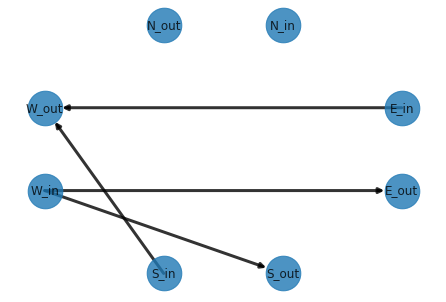

(4, 5)


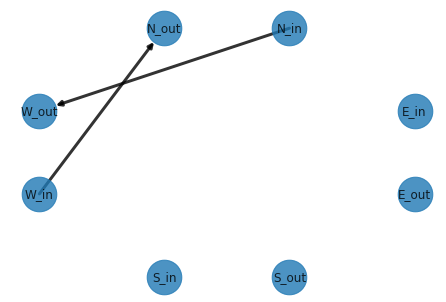

(5, 0)


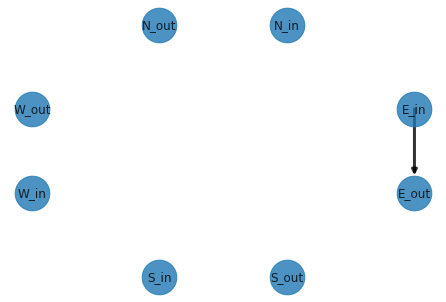

(5, 1)


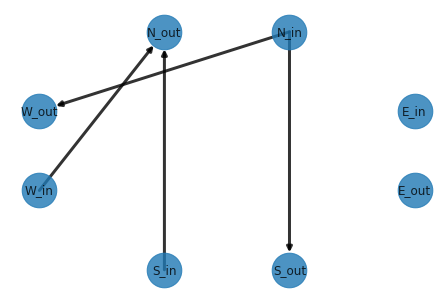

(5, 2)


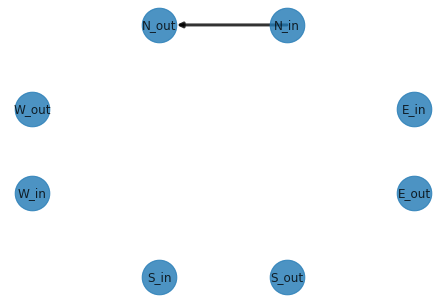

(5, 4)


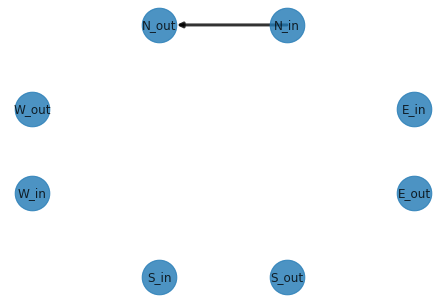

(6, 1)


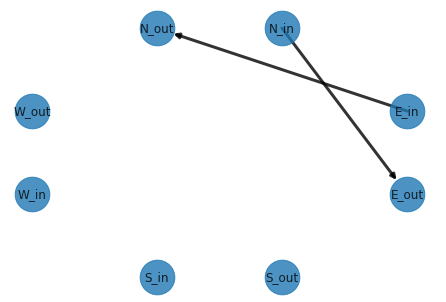

(6, 2)


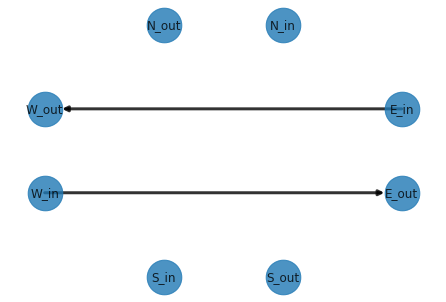

(6, 3)


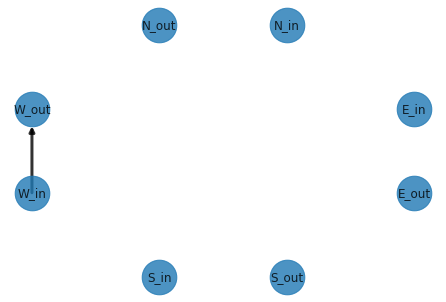

In [23]:
for index,cell in np.ndenumerate(matrix_rail):
    if cell >0 :
        superNode = test.get_superNode_at(index)
        print(index)
        superNode.show()

In [30]:
def contains_cycle(G):
    try:
        nx.find_cycle(G)
    except(nx.NetworkXNoCycle):
        return False
    return True

In [31]:
contains_cycle(test)

False

In [32]:
contains_cycle(nx.cycle_graph(5))

True

In [49]:
for p in nx.all_pairs_shortest_path(test):
    print(p)
    print("\n")

('(0, 0)_S_in', {'(0, 0)_S_in': ['(0, 0)_S_in'], '(0, 0)_S_out': ['(0, 0)_S_in', '(0, 0)_S_out'], '(1, 0)_N_out': ['(0, 0)_S_in', '(1, 0)_N_out']})


('(0, 0)_S_out', {'(0, 0)_S_out': ['(0, 0)_S_out']})


('(0, 2)_S_in', {'(0, 2)_S_in': ['(0, 2)_S_in'], '(0, 2)_S_out': ['(0, 2)_S_in', '(0, 2)_S_out'], '(1, 2)_N_out': ['(0, 2)_S_in', '(1, 2)_N_out']})


('(0, 2)_S_out', {'(0, 2)_S_out': ['(0, 2)_S_out']})


('(0, 6)_S_in', {'(0, 6)_S_in': ['(0, 6)_S_in'], '(0, 6)_S_out': ['(0, 6)_S_in', '(0, 6)_S_out'], '(1, 6)_N_out': ['(0, 6)_S_in', '(1, 6)_N_out']})


('(0, 6)_S_out', {'(0, 6)_S_out': ['(0, 6)_S_out']})


('(1, 0)_N_in', {'(1, 0)_N_in': ['(1, 0)_N_in'], '(1, 0)_S_out': ['(1, 0)_N_in', '(1, 0)_S_out']})


('(1, 0)_S_out', {'(1, 0)_S_out': ['(1, 0)_S_out']})


('(1, 0)_S_in', {'(1, 0)_S_in': ['(1, 0)_S_in'], '(1, 0)_N_out': ['(1, 0)_S_in', '(1, 0)_N_out'], '(0, 0)_N_out': ['(1, 0)_S_in', '(0, 0)_N_out'], '(2, 0)_N_out': ['(1, 0)_S_in', '(2, 0)_N_out']})


('(1, 0)_N_out', {'(1, 0)_N_ou

paths = nx.all_simple_paths(test,str((1,0))+"_"+"N_in",str((3,0))+"_"+"S_out")
for p in paths:
    print(p)